In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filmes = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [40]:
def pizza_plot(df, column_name):
    counts = df[column_name].value_counts()

    labels = counts.index
    sizes = counts.values

    plt.figure(figsize=(11, 11))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

    # Adiciona um título
    plt.title('Pizza Chart of ' + column_name)

    # Exibe o gráfico
    plt.axis('equal')  # Mantém o aspecto do gráfico de pizza
    plt.show()


In [41]:
filmes.columns

Index(['movieId', 'title', 'genres', 'genere_1'], dtype='object')

In [42]:
print(len(filmes['genres'].unique()))
print(len(filmes['title'].unique()))

951
9737


In [43]:
for i in range(1, 11, 1):
    filmes[f'genere_{i}'] = filmes['genres'].apply(lambda x: x.split('|')[i-1])
    break

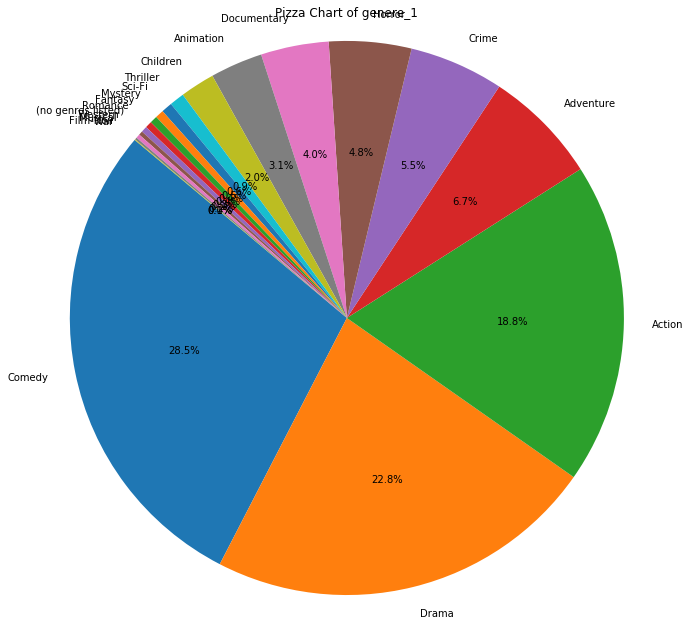

In [44]:
pizza_plot(filmes, 'genere_1')

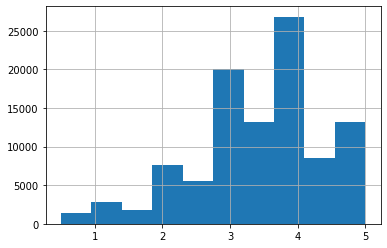

In [56]:
ratings['rating'].hist(bins = 10)

In [55]:
len(ratings['rating'].unique())

10

In [46]:
len(ratings['userId'].unique())

610

In [66]:
p = pd.pivot_table(ratings,
               index = 'movieId',
               values = 'rating',
               aggfunc = [np.mean, len])

p.columns = [ 'rating', 'n_avaliações']

top = p[p['n_avaliações']>=10].reset_index().sort_values(by = 'rating', ascending = False).head(10)

In [67]:
top

,movieId,rating,n_avaliações
411,1041,4.590909,11
1186,3451,4.545455,11
456,1178,4.541667,12
441,1104,4.475000,20
871,2360,4.458333,12
484,1217,4.433333,15
158,318,4.429022,317
377,951,4.392857,14
722,1927,4.350000,10
1190,3468,4.333333,18


In [77]:
filmes['ano'] = filmes['title'].apply(lambda x:  x[-5:-1].replace(')', ''))

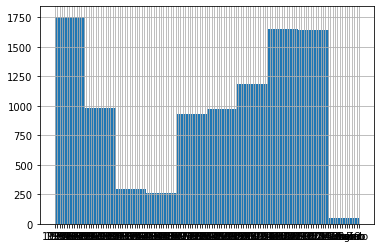

In [80]:
filmes['ano'].hist()

In [70]:
pd.merge(top, filmes, on = 'movieId')[['title', 'rating', 'n_avaliações']]

,title,rating,n_avaliações
0,Secrets & Lies (1996),4.590909,11
1,Guess Who's Coming to Dinner (1967),4.545455,11
2,Paths of Glory (1957),4.541667,12
3,"Streetcar Named Desire, A (1951)",4.475000,20
4,"Celebration, The (Festen) (1998)",4.458333,12
5,Ran (1985),4.433333,15
6,"Shawshank Redemption, The (1994)",4.429022,317
7,His Girl Friday (1940),4.392857,14
8,All Quiet on the Western Front (1930),4.350000,10
9,"Hustler, The (1961)",4.333333,18


In [82]:
df = filmes.merge(ratings, on = 'movieId')

In [86]:
tf = pd.pivot_table(df,
                    index = 'title',
                    columns = 'userId',
                    values = 'rating').fillna(0)

In [87]:
tf

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [88]:
import sklearn.metrics.pairwise as pw

In [89]:
r = pw.cosine_similarity(tf)

In [90]:
r

array([[1.        , 0.        , 0.        , ..., 0.32732684, 0.        ,
        0.        ],
       [0.        , 1.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32732684, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [92]:
rf = pd.DataFrame(r, columns = tf.index, index = tf.index)

In [98]:
filme_assistido = 'Shawshank Redemption, The (1994)'
recomenda = pd.DataFrame(rf[filme_assistido].sort_values(ascending = False).iloc[1:])

In [100]:
recomenda.head(10)

,"Shawshank Redemption, The (1994)"
title,
Forrest Gump (1994),0.712993
Pulp Fiction (1994),0.702366
"Silence of the Lambs, The (1991)",0.647066
"Usual Suspects, The (1995)",0.631787
Schindler's List (1993),0.629145
Fight Club (1999),0.606644
Braveheart (1995),0.597317
"Matrix, The (1999)",0.589155
Apollo 13 (1995),0.578835
